# Plot Brain Images
This script plots/displays multiple structural (T1) MRI files for quick and easy checking. The plots can also be interactive given the correct function (`view_img()`).

In [2]:
from os import listdir, makedirs
from os.path import isfile, join, exists

import numpy as np
from nilearn import plotting, image

## Plot Structural Images

In [56]:
release = 7
age = 10
age_dir = f'/imaging3/owenlab/wilson/MovieData/Release{release}/Age{age}'
# This list filters all subjects so we can only view the bad subjects
desired_subjects = ['sub-NDARAB055BPR',
'sub-NDARBE912PB0',
'sub-NDAREB953UMY',
'sub-NDARGK442YHH',
'sub-NDARJJ216EGT',
'sub-NDARRN047XHC',
'sub-NDARTV119WJK',
'sub-NDARTW456RAG',
'sub-NDARTY533VXQ',
'sub-NDARXK303DDB',]

# Grab all subjects
subjects = [folder for folder in listdir(age_dir) if folder.startswith("sub-")]
filtered_subjects = [subject for subject in subjects if subject in desired_subjects]
print("Num desired subjects:", len(filtered_subjects))

10


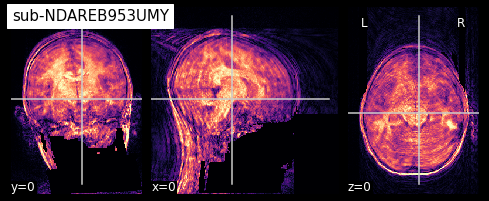

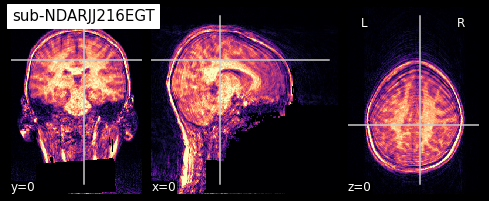

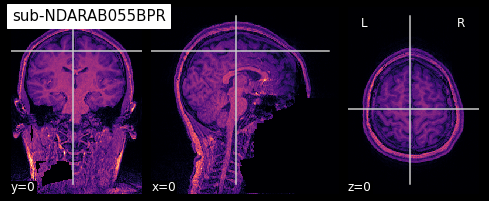

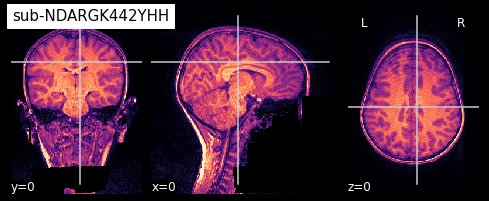

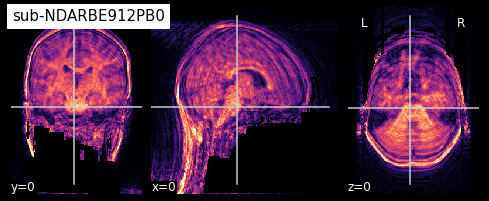

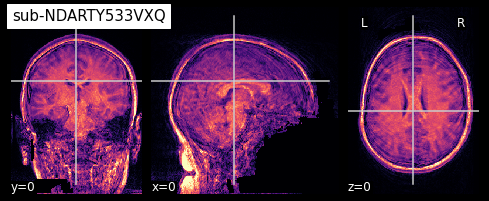

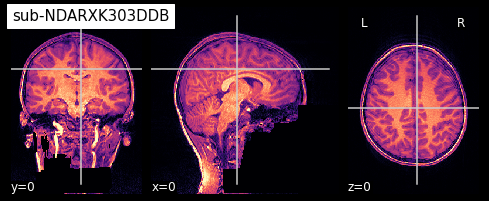

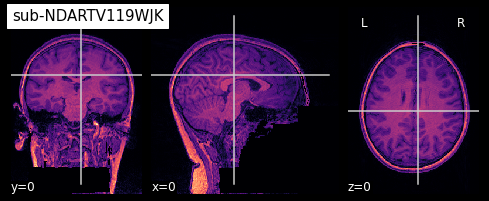

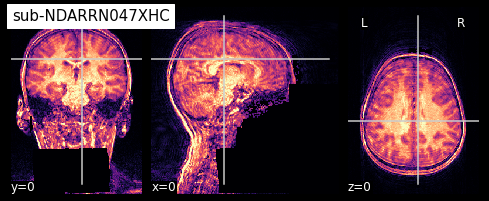

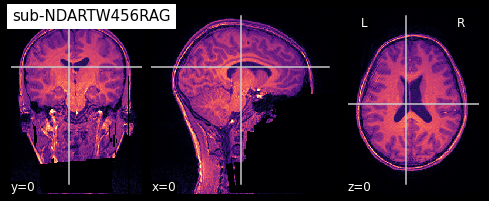

In [57]:
# For each subject, display their T1w scan
for subject in filtered_subjects:
    subject_path = join(age_dir, subject, "sub-*_T1w.nii")
    img = image.load_img(subject_path)
    plotting.plot_anat(img, title=subject, cut_coords=(0, 0, 0), 
                       dim=-1, cmap='magma')

## Plot Functional Images

In [51]:
release = 7
age = 10
norm_write_dir = f'/imaging3/owenlab/wilson/MovieData/Release{release}/Age{age}/BioBank_Analysis_All/aamod_norm_write_00001'
subjects = [folder for folder in listdir(norm_write_dir) if folder.startswith("sub-")]

print("Num subjects:", len(subjects))

Num subjects: 47


In [52]:
start, end = 0, 15
for subject in subjects[start:end]:
    print("Subject:", subject)

Subject: sub-NDARYY419ZXX
Subject: sub-NDARZD985LU8
Subject: sub-NDARDU482DGK
Subject: sub-NDARFR696PLG
Subject: sub-NDARDW711NYZ
Subject: sub-NDARFC286KV1
Subject: sub-NDARZL799MFW
Subject: sub-NDARXH140YZ0
Subject: sub-NDARJG738WY6
Subject: sub-NDARCC059WTH
Subject: sub-NDARMF444MAY
Subject: sub-NDARRA981BCM
Subject: sub-NDAREB953UMY
Subject: sub-NDARJJ216EGT
Subject: sub-NDARAB055BPR


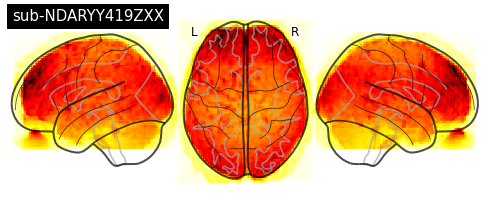

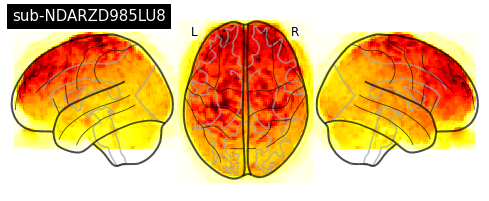

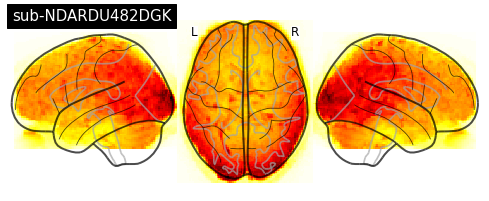

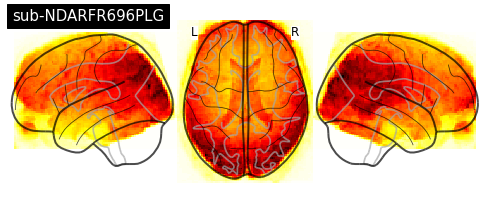

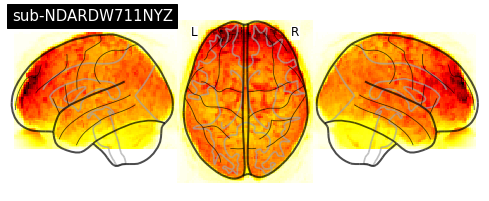

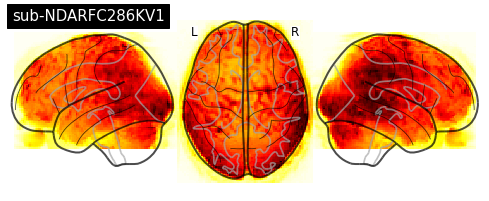

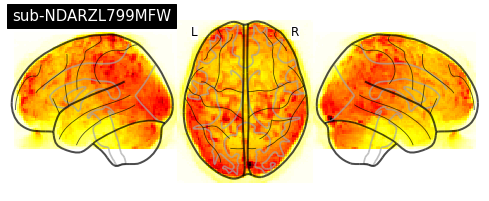

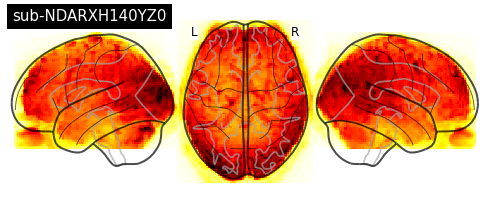

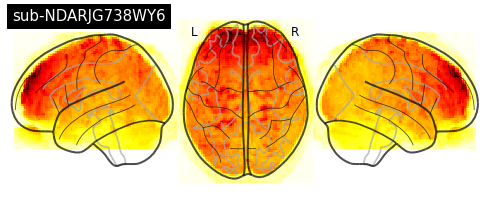

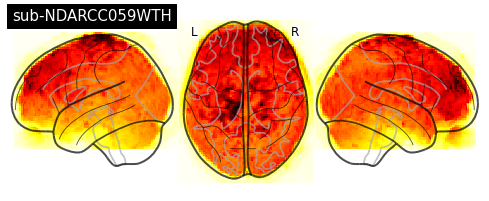

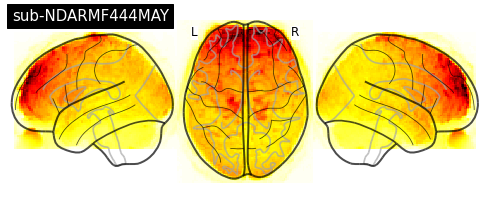

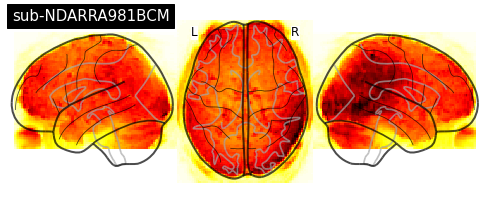

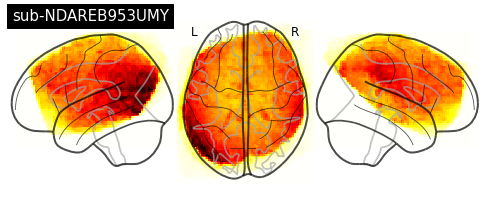

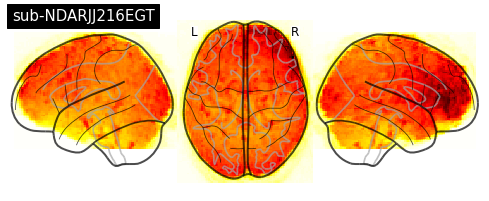

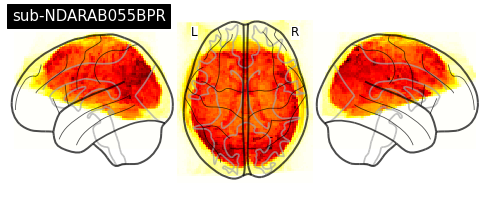

In [53]:
# For each subject, display their normalized fMRI
for subject in subjects[start:end]:
    subject_path = join(norm_write_dir, subject)
    
    subject_niftis = [join(subject_path, f) for f in listdir(subject_path) 
                          if isfile(join(subject_path, f)) and f.startswith('wrsub')]
    concat_img = image.concat_imgs(subject_niftis)
#     print(concat_img.shape)
    img = image.index_img(concat_img, 0)
#     img = image.mean_img(concat_img)
#     print(img.shape)
    
    plotting.plot_glass_brain(img, title=subject, threshold=None, display_mode='lzr')

### Display single fMRI

In [14]:
subject_path = '/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_norm_write_00001/sub-NDARPL406KX4'

files = [join(subject_path, f) for f in listdir(subject_path) if isfile(join(subject_path, f)) and f.startswith('wrsub') and f.endswith('.nii')]
concat_file = image.concat_imgs(files)
print(files[0])

['/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_norm_write_00001/sub-NDARPL406KX4/wrsub-NDARPL406KX4_task-movieDM_bold_0364.nii']


In [12]:
selected_volumes = image.index_img(concat_file, slice(3, 5))

for img in image.iter_img(selected_volumes):
    plotting.view_img(img)

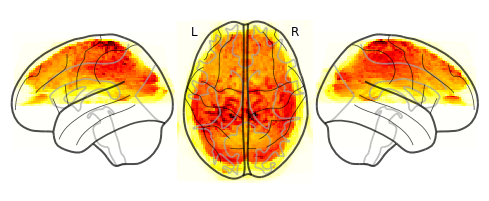

In [13]:
plotting.plot_glass_brain(image.mean_img(concat_file), threshold=None, display_mode='lzr')